In [1]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [8]:
import numpy
a = numpy.zeros([3,4])

a[0,0] = 1
a[0,1] = 3
a[0,2] = 2
a[0,3] = 8
a[1,0] = 9
a[1,3] = 3
a[2,0] = 4
a[2,1] = 6
a[2,2] = 7
a[2,3] = 5

print(a)


[[1. 3. 2. 8.]
 [9. 0. 0. 3.]
 [4. 6. 7. 5.]]


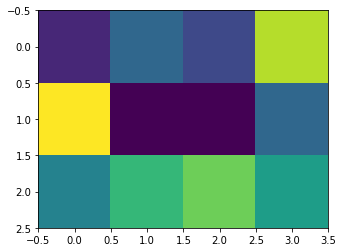

In [9]:
import matplotlib.pyplot
%matplotlib inline
matplotlib.pyplot.imshow(a, interpolation="nearest")


In [10]:
# class for a dog object
class Dog:
    # dogs can bark()
    def bark(self):
        print("woof!")
        pass
    pass


In [11]:
sizzles = Dog()
sizzles.bark()


woof!


In [18]:
# class for a dog object
class Dog:
    # initialization method with internal data
    def __init__(self, petname, temp):
        self.name = petname;
        self.temperature = temp;
        
    # get status
    def status(self):
        print("dog name is ", self.name);
        print("dog temperature is ", self.temperature);
        pass
    
    # set temperature
    def setTemperature(self, temp):
        self.temperature = temp;
        pass
    
    # dogs can bark()
    def bark(self):
        print("woof!")
        pass
    
    pass

In [21]:
lassie = Dog("Lassie", 37)
lassie.status()

dog name is  Lassie
dog temperature is  37


In [24]:
lassie.setTemperature(39)

In [25]:
lassie.status()

dog name is  Lassie
dog temperature is  39


In [97]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special


# nerual Network class definition
class neuralNetwork:
    
    # initialize the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes    
        
        # link weight matrices, wih and who
        # weight inside the arrays are w_i_j, where link is from node i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        self.wih = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.onodes, -0.5), (self.onodes, self.hnodes))
                    
        # learning rate 
        self.lr = learningrate
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)    
    
        pass
                    
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin-2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # output layer error is the (target - acutal)
        output_errors = targets - final_outputs
        # hidden layer error is the output_errors, split by weights, recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * 
                                         (1.0 - final_outputs)), numpy.transpose(hidden_outputs))
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * 
                                         (1.0 - hidden_outputs)), numpy.transpose(inputs))
        
        
        pass
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # calculate signals into hidden layer            
        hidden_inputs = numpy.dot(self.wih, inputs)
                    
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs) 
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        
        # calcuate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
                    
        return final_outputs
    


In [98]:
# number of input, hidden and output nodes
input_nodes = 3
hidden_nodes = 3
output_nodes = 3

# learning rate is 0.3
learning_rate = 0.3

# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)




In [99]:
# numpy.random.rand(3,3) - 0.5
numpy.random.normal(0.0, pow(3, -0.5), (3, 3))


array([[-0.0162061 , -0.1035645 ,  0.56592107],
       [-0.50132151, -0.74984364, -0.94971674],
       [-0.12191283, -0.89872605,  0.01122091]])

In [101]:
# test query (doesn't mean anything useful yet)
print("input array is: ")
print(n.wih)
print("output array is: ")
print(n.who)
print("final query result is:")
print(n.query([1.0, 0.5, -0.5]))


input array is: 
[[ 0.26129282  0.58638983 -0.42111047]
 [ 0.05563626  1.53309029 -1.04090925]
 [ 0.98246545 -0.29765994 -0.20873566]]
output array is: 
[[-0.57631657 -0.00545144  0.35744121]
 [-0.33626478 -0.40065761 -0.3595627 ]
 [-0.91310418 -0.97071689 -0.67137078]]
final query result is:
[[0.46487376]
 [0.30883101]
 [0.1329226 ]]
